# Urls.json Data Cleaning & Analysis

This section of the Jupyter Notebook:
1. Loads `urls.json`.
2. Checks for duplicate URLs and removes them if necessary.
3. Validates URLS and Detects any missing Data.
4. Provides various analyses on the dataset, including visualizations.

## Load JSON & Check for Duplicates

This cell loads the JSON file, checks for duplicate URLs, and removes them **only if necessary**. 
If duplicates are found, the cleaned dataset overwrites `urls.json`.

In [37]:
import json
import pandas as pd # type: ignore

# Load the JSON file
file_path = 'TVIA_urls.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Check for duplicate URLs
initial_duplicates = df.duplicated(subset=['url']).sum()
print(f'Initial duplicate count: {initial_duplicates}')

# Remove duplicates if found
if initial_duplicates > 0:
    df = df.drop_duplicates(subset=['url'])
    print(f'Duplicates removed. Final duplicate count: {df.duplicated(subset=["url"]).sum()}')

    # Overwrite the original file
    df.to_json(file_path, orient='records', indent=4)
    print(f'Updated {file_path} with unique URLs.')
else:
    print('No duplicates found. No changes made.')

Initial duplicate count: 0
No duplicates found. No changes made.


## Validate URLs & Detect Missing Data

This cell checks for missing `url` or `source` fields and identifies URLs that don’t match the expected **archive.org** format. If issues are found, they will be displayed.  

In [38]:
import re

# Check for missing values in 'url' and 'source'
missing_values = df[df.isnull().any(axis=1)]
if not missing_values.empty:
    print("Rows with missing values:")
    print(missing_values)
else:
    print("No missing values found.")

# Identify URLs that do not follow the expected format
expected_format = r"https://archive\.org/details/[\w\-_]+"
invalid_urls = df[~df['url'].str.match(expected_format, na=False)]

if not invalid_urls.empty:
    print("URLs that do not follow the expected format:")
    print(invalid_urls)
else:
    print("All URLs match the expected format.")

No missing values found.
All URLs match the expected format.


## Basic Statistics Analysis

This cell prints key insights like total unique URLs and total unique sources.

In [39]:
import json
import pandas as pd  # type: ignore

# Load the JSON file
file_path = 'TVIA_urls.json'

with open(file_path, 'r') as file:
	data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Total unique URLs and sources
total_unique_urls = df['url'].nunique()
total_unique_sources = df['source'].nunique()

print(f'Total Unique URLs: {total_unique_urls}')
print(f'Total Unique Sources: {total_unique_sources}')

Total Unique URLs: 120
Total Unique Sources: 8


## URLs per Source (Bar Chart)

This cell visualizes the count of URLs per source.

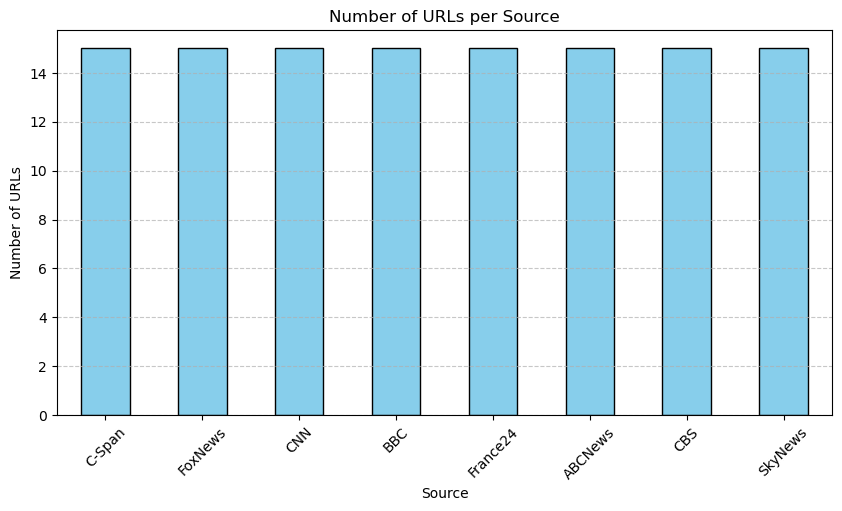

In [40]:
import matplotlib.pyplot as plt  # type: ignore

# Count occurrences per source
source_counts = df['source'].value_counts()

# Plot the distribution of sources
plt.figure(figsize=(10, 5))
source_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Source')
plt.ylabel('Number of URLs')
plt.title('Number of URLs per Source')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Sources by URL Count

This cell shows the sources with the most URLs (tabular format)

In [41]:
top_sources = df['source'].value_counts().head(10)
print('Sources by URL Count:')
print(top_sources)

Sources by URL Count:
C-Span      15
FoxNews     15
CNN         15
BBC         15
France24    15
ABCNews     15
CBS         15
SkyNews     15
Name: source, dtype: int64


## Unique Sources (Pie Chart)

This cell visualizes the proportion of URLs per source in a pie chart.

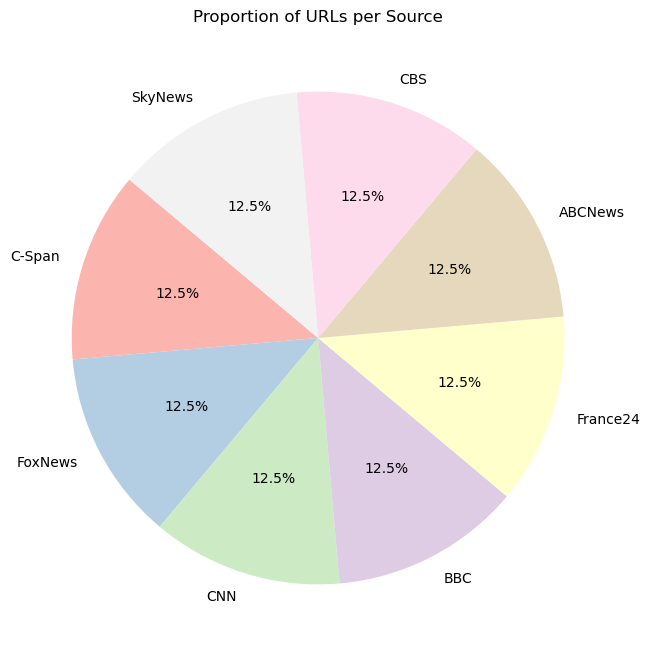

In [42]:
plt.figure(figsize=(8, 8))
source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Proportion of URLs per Source')
plt.ylabel('')  # Hide y-label for clarity
plt.show()

# Urls_tiktok.json Data Cleaning & Analysis

This section of the Jupyter Notebook:
1. Loads `urls_tiktok.json`.
2. Checks for duplicate URLs and removes them if necessary.
3. Validates URLS and Detects any missing Data.
4. Provides various analyses on the dataset, including visualizations.

## Load JSON & Check for Duplicates

This cell loads the JSON file, checks for duplicate URLs, and removes them **only if necessary**. 
If duplicates are found, the cleaned dataset overwrites `urls_tiktok.json`.

In [43]:
import json
import pandas as pd  # type: ignore

# Load the JSON file
file_path = 'TKTK_urls.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Check for duplicate URLs
initial_duplicates = df.duplicated(subset=['url']).sum()
print(f'Initial duplicate count: {initial_duplicates}')

# Remove duplicates if found
if initial_duplicates > 0:
    df = df.drop_duplicates(subset=['url'])
    final_duplicates = df.duplicated(subset=['url']).sum()
    print(f'Duplicates removed. Final duplicate count: {final_duplicates}')
    
    # Convert back to list of dictionaries and overwrite the original file
    with open(file_path, 'w') as file:
        json.dump(df.to_dict(orient='records'), file, indent=4, ensure_ascii=False)
    print(f'Updated {file_path} with unique URLs.')
else:
    print('No duplicates found. No changes made.')


Initial duplicate count: 0
No duplicates found. No changes made.


## Basic Statistics Analysis

This cell prints key insights like total unique URLs and total unique sources.

In [44]:
import json
import pandas as pd  # type: ignore

# Load the JSON file
file_path = 'TKTK_urls.json'

with open(file_path, 'r') as file:
	data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Total unique URLs and sources
total_unique_urls = df['url'].nunique()
total_unique_sources = df['source'].nunique()

print(f'Total Unique URLs: {total_unique_urls}')
print(f'Total Unique Sources: {total_unique_sources}')

Total Unique URLs: 600
Total Unique Sources: 8


## URLs per Source (Bar Chart)

This cell visualizes the count of URLs per source.

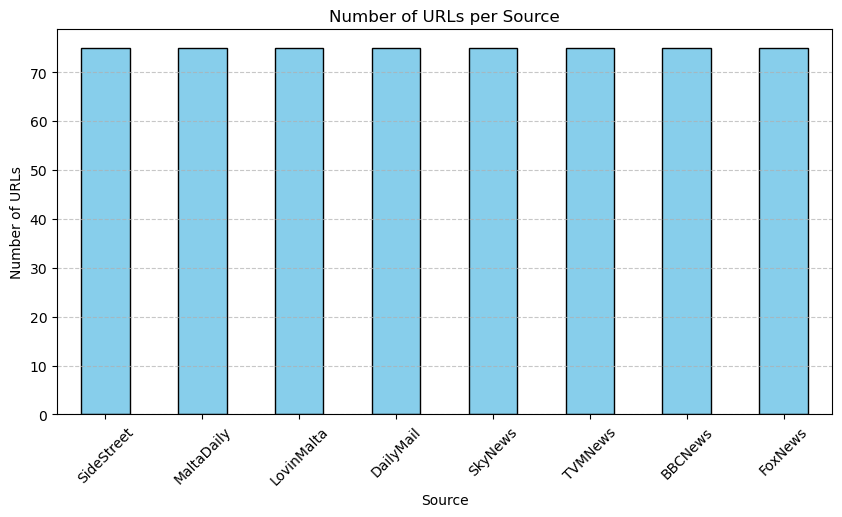

In [45]:
import matplotlib.pyplot as plt  # type: ignore

# Count occurrences per source
source_counts = df['source'].value_counts()

# Plot the distribution of sources
plt.figure(figsize=(10, 5))
source_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Source')
plt.ylabel('Number of URLs')
plt.title('Number of URLs per Source')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Sources by URL Count

This cell shows the sources with the most URLs (tabular format)

In [46]:
top_sources = df['source'].value_counts().head(10)
print('Sources by URL Count:')
print(top_sources)

Sources by URL Count:
SideStreet    75
MaltaDaily    75
LovinMalta    75
DailyMail     75
SkyNews       75
TVMNews       75
BBCNews       75
FoxNews       75
Name: source, dtype: int64


## Unique Sources (Pie Chart)

This cell visualizes the proportion of URLs per source in a pie chart.

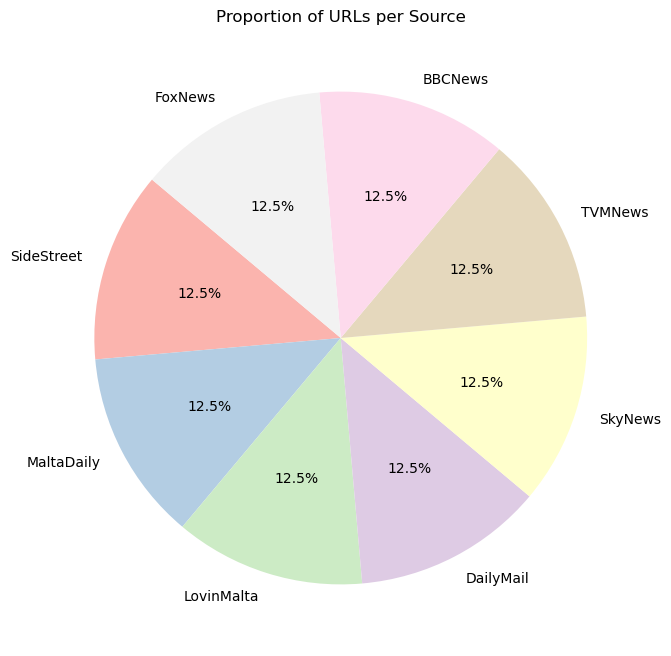

In [47]:
plt.figure(figsize=(8, 8))
source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Proportion of URLs per Source')
plt.ylabel('')  # Hide y-label for clarity
plt.show()